In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
df_train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

In [3]:
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [4]:
df_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [5]:
count2= df_test.isna().sum()
count2

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [6]:
count= df_train.isna().sum()
count

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [7]:
df_test.shape

(4277, 13)

In [8]:
columns = ['HomePlanet','VIP','CryoSleep','Cabin','Destination','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
df_train.dropna(subset=columns,how='any',inplace=True)
df_test.dropna(subset=columns,how='any',inplace=True)

In [9]:
df_test.shape

(3424, 13)

In [10]:
count1 = df_train.isna().sum()
count2 = df_test.isna().sum()


count2

PassengerId      0
HomePlanet       0
CryoSleep        0
Cabin            0
Destination      0
Age             69
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Name            75
dtype: int64

In [11]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean')
df_train['Age'] = imputer.fit_transform(df_train[['Age']])
df_test['Age'] = imputer.fit_transform(df_test[['Age']])

df_train['Age']

0       39.0
1       24.0
2       58.0
3       33.0
4       16.0
        ... 
8688    41.0
8689    18.0
8690    26.0
8691    32.0
8692    44.0
Name: Age, Length: 6917, dtype: float64

In [12]:
df_train = df_train.drop(columns=['Name'],axis=1)
df_test = df_test.drop(columns=['Name'],axis=1)
df_test.shape

(3424, 12)

In [13]:
print(df_test.isna().sum())

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64


In [14]:
from sklearn.preprocessing import OneHotEncoder
df_train
#'HomePlanet','Cabin','Destination','Transported','VIP','CryoSleep'- have to be encoded
#'Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck' - direct conversion

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


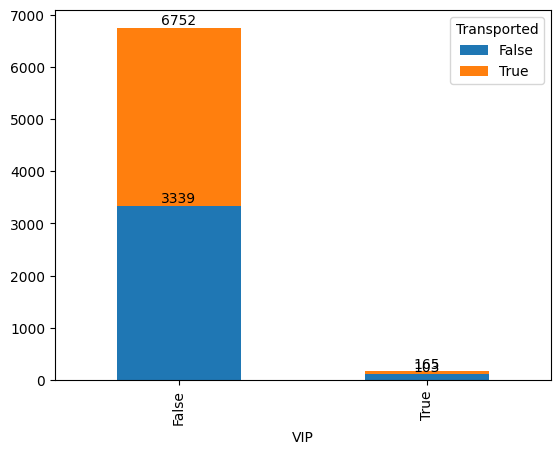

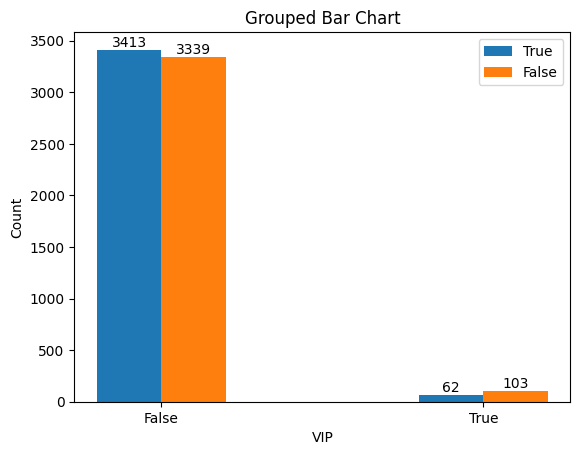

In [15]:
import matplotlib.pyplot as plt
pivot_df = df_train.pivot_table(index='VIP',columns='Transported',aggfunc='size',fill_value=0)
#stacked plot
ax=pivot_df.plot(kind='bar',stacked=True)
for container in ax.containers:
    ax.bar_label(container)
plt.show()
#grouped plot
x=np.arange(len(pivot_df.index))
bar_width = 0.2
plt.bar(x-bar_width/2,pivot_df[True],width=bar_width,label='True')
plt.bar(x+bar_width/2,pivot_df[False],width=bar_width,label='False')
plt.xlabel('VIP')
plt.ylabel('Count')
plt.title('Grouped Bar Chart')
plt.xticks(x,pivot_df.index)

for i,val in enumerate(pivot_df[True]):
    plt.text(i- bar_width/2 , val+1, str(val), ha='center', va='bottom')
for i,val in enumerate(pivot_df[False]):
    plt.text(i+ bar_width/2 , val+1, str(val), ha='center', va='bottom')
    
plt.legend()
plt.show()

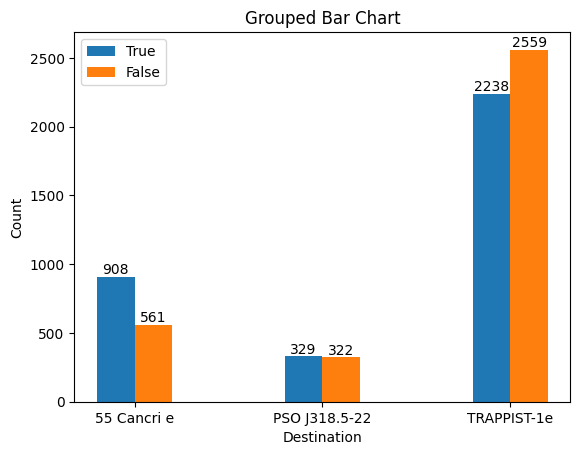

In [16]:
pivot_df = df_train.pivot_table(index='Destination',columns='Transported',aggfunc='size',fill_value=0)
#grouped plot
x=np.arange(len(pivot_df.index))
bar_width = 0.2
plt.bar(x-bar_width/2,pivot_df[True],width=bar_width,label='True')
plt.bar(x+bar_width/2,pivot_df[False],width=bar_width,label='False')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.title('Grouped Bar Chart')
plt.xticks(x,pivot_df.index)

for i,val in enumerate(pivot_df[True]):
    plt.text(i- bar_width/2 , val+1, str(val), ha='center', va='bottom')
for i,val in enumerate(pivot_df[False]):
    plt.text(i+ bar_width/2 , val+1, str(val), ha='center', va='bottom')
    
plt.legend()
plt.show()

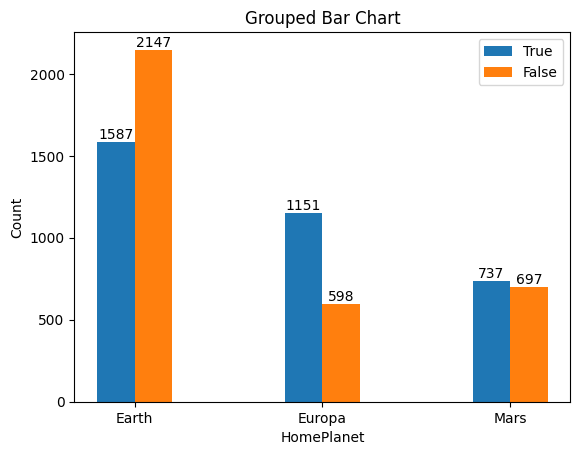

In [17]:
pivot_df = df_train.pivot_table(index='HomePlanet',columns='Transported',aggfunc='size',fill_value=0)
#grouped plot
x=np.arange(len(pivot_df.index))
bar_width = 0.2
plt.bar(x-bar_width/2,pivot_df[True],width=bar_width,label='True')
plt.bar(x+bar_width/2,pivot_df[False],width=bar_width,label='False')
plt.xlabel('HomePlanet')
plt.ylabel('Count')
plt.title('Grouped Bar Chart')
plt.xticks(x,pivot_df.index)

for i,val in enumerate(pivot_df[True]):
    plt.text(i- bar_width/2 , val+1, str(val), ha='center', va='bottom')
for i,val in enumerate(pivot_df[False]):
    plt.text(i+ bar_width/2 , val+1, str(val), ha='center', va='bottom')
    
plt.legend()
plt.show()

In [18]:
df_train['Age'].unique()

array([39.        , 24.        , 58.        , 33.        , 16.        ,
       44.        , 26.        , 35.        , 14.        , 45.        ,
       32.        , 48.        , 28.        ,  0.        ,  1.        ,
       49.        , 10.        ,  7.        , 21.        , 15.        ,
       34.        , 43.        , 47.        ,  2.        , 23.        ,
       20.        , 17.        , 55.        ,  4.        , 56.        ,
       28.89739799, 25.        , 38.        , 27.        , 36.        ,
       22.        , 62.        , 18.        , 42.        , 19.        ,
       37.        , 13.        ,  8.        , 40.        ,  3.        ,
       54.        ,  9.        ,  6.        , 31.        , 29.        ,
       64.        , 67.        , 61.        , 50.        , 11.        ,
       51.        , 41.        , 30.        , 46.        , 60.        ,
       63.        , 57.        ,  5.        , 79.        , 68.        ,
       59.        , 74.        , 12.        , 65.        , 53.  

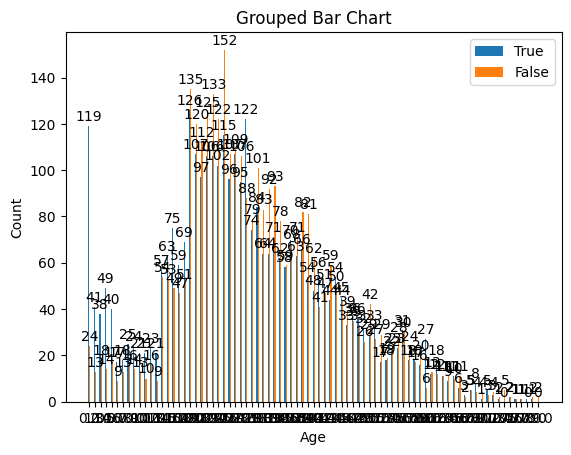

In [19]:
pivot_df = df_train.pivot_table(index='Age',columns='Transported',aggfunc='size',fill_value=0)
#grouped plot
x=np.arange(len(pivot_df.index))
bar_width = 0.2
plt.bar(x-bar_width/2,pivot_df[True],width=bar_width,label='True')
plt.bar(x+bar_width/2,pivot_df[False],width=bar_width,label='False')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Grouped Bar Chart')
plt.xticks(x,pivot_df.index)

for i,val in enumerate(pivot_df[True]):
    plt.text(i- bar_width/2 , val+1, str(val), ha='center', va='bottom')
for i,val in enumerate(pivot_df[False]):
    plt.text(i+ bar_width/2 , val+1, str(val), ha='center', va='bottom')
    
plt.legend()
plt.show()

In [20]:
print(df_train.isna().sum())

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [22]:
col1=['HomePlanet','CryoSleep','Cabin','Destination','Destination','VIP']
col2 = ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
for col in col2:
    df_test[col]=df_test[col].astype(float)
    df_train[col]=df_train[col].astype(float)
from sklearn.preprocessing import LabelEncoder    
label = LabelEncoder()
for col in col1:
    df_train[col] = label.fit_transform(df_train[col])
    df_test[col] = label.fit_transform(df_test[col])

    

In [23]:
df_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,0,1,2367,2,27.000000,0,0.0,0.0,0.0,0.0,0.0
1,0018_01,0,0,1600,2,19.000000,0,0.0,9.0,0.0,2823.0,0.0
2,0019_01,1,1,229,0,31.000000,0,0.0,0.0,0.0,0.0,0.0
3,0021_01,1,0,231,2,38.000000,0,0.0,6652.0,0.0,181.0,585.0
4,0023_01,0,0,1662,2,20.000000,0,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4270,9265_01,2,0,527,2,43.000000,0,47.0,0.0,3851.0,0.0,0.0
4271,9266_01,0,0,1420,2,40.000000,0,0.0,865.0,0.0,3.0,0.0
4272,9266_02,0,1,2280,2,34.000000,0,0.0,0.0,0.0,0.0,0.0
4274,9271_01,2,1,535,0,28.596423,0,0.0,0.0,0.0,0.0,0.0


In [24]:
X= df_train.drop(columns=['Transported'],axis=1)
y=df_train['Transported']

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
X.dtypes

PassengerId      object
HomePlanet        int64
CryoSleep         int64
Cabin             int64
Destination       int64
Age             float64
VIP               int64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
dtype: object

In [27]:
y.dtypes

dtype('bool')

In [28]:
svm_clf = SVC(kernel='rbf')
svm_clf.fit(X_train,y_train)

SVC()

In [29]:
y_pred = svm_clf.predict(X_test)

In [30]:
acc = accuracy_score(y_test,y_pred)
print(acc)

0.5527456647398844


In [31]:
y_pred

array([False,  True,  True, ..., False,  True, False])

In [32]:
prediction = svm_clf.predict(df_test)

In [33]:
predictions = pd.DataFrame(prediction, columns=['Transported'])
predictions

,Transported
0,False
1,False
2,False
3,False
4,False
...,...
3419,False
3420,False
3421,False
3422,False


In [34]:
p = pd.DataFrame(df_test['PassengerId'], columns=['PassengerId'])
p.reset_index(drop=True,inplace=True)
predictions.reset_index(drop=True,inplace=True)
submission = pd.concat([p,predictions],axis=1)
submission

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
3419,9265_01,False
3420,9266_01,False
3421,9266_02,False
3422,9271_01,False


In [35]:
submission.to_csv("svm.csv",index=False)